# Graph

- useful tools 
    - [NetworkX](https://networkx.org/) 
    - [NetworkX Reference-pdf](https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf)
    - [github page](https://github.com/networkx/networkx) 
    - [tutorial](https://networkx.org/documentation/stable/tutorial.html)

## Graph search 
[CS 188 (2018) - Lecture 2-Uninformed Search](https://inst.eecs.berkeley.edu/~cs188/fa18/assets/slides/lec2/FA18_cs188_lecture2_uninformed_search_1pp.pdf) - page 29 

The lecture provides a uniformed view of different search stratergies such as BFS, DFS, A*, Dijkstra, Best first search, UCS, or algorithms using other heuristics. 
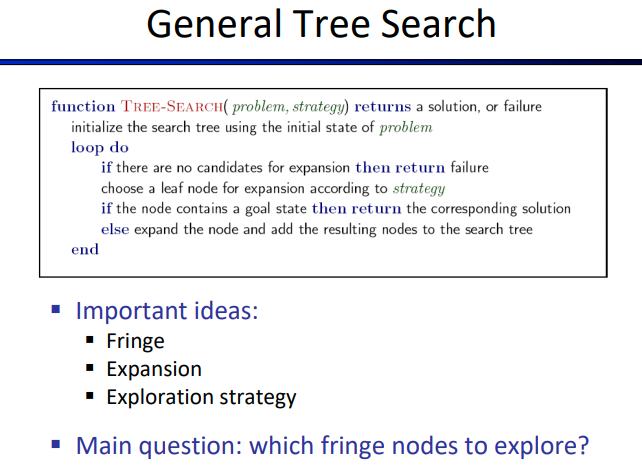


## 102. Binary Tree Level Order Traversal
[102. Binary Tree Level Order Traversal](https://leetcode.com/problems/binary-tree-level-order-traversal/)
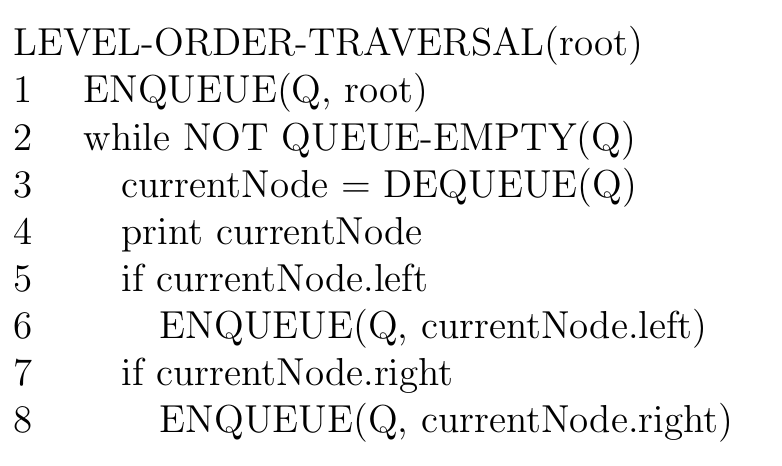

In [1]:
class Solution:
    def levelOrder(self, root): 
        if not root: 
            return [] 
        
        # BFS solution 
        q = deque([root])   # initialize using [root] or not? 
                            # has to be [root] 
        result = []   
        
        while q: 
            level = [] 
            size = len(q) 
            for _ in range(size): 
                cur = q.popleft()  
                level.append(cur.val) 
                if cur.left: 
                    q.append(cur.left) 
                if cur.right: 
                    q.append(cur.right) 
            result.append(level) 
        
        return result 

## 133. Clone Graph 
[133. Clone Graph](https://leetcode.com/problems/clone-graph/) 

http://www.lintcode.com/problem/clone-graph/

http://www.jiuzhang.com/solutions/clone-graph/

图的遍历(由点及面)

## 200. Number of Islands 
[200. Number of Islands](https://leetcode.com/problems/number-of-islands/) 

## 785. Is Graph Bipartite? 
[785. Is Graph Bipartite?](https://leetcode.com/problems/is-graph-bipartite/) 


## 1197. Minimum Knight Moves 
[1197. Minimum Knight Moves](https://leetcode.com/problems/minimum-knight-moves/) 


## 269. Alien Dictionary 
[269. Alien Dictionary](https://leetcode.com/problems/alien-dictionary/) 

http://www.lintcode.com/problem/alien-dictionary/

http://www.jiuzhang.com/solution/alien-dictionary/


考点1:如何构建图
考点2:如何存储图
考点3:如何拓扑排序


## 207. Course Schedule 
[207. Course Schedule](https://leetcode.com/problems/course-schedule/) 


http://www.lintcode.com/problem/course-schedule/

http://www.lintcode.com/problem/course-schedule-ii/

换了个皮,第二问需要判断是否没有拓扑序


### 378. Kth Smallest Element in a Sorted Matrix 
[378. Kth Smallest Element in a Sorted Matrix](https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/) 

```
Given an n x n matrix where each of the rows and columns is sorted in ascending order, return the kth smallest element in the matrix.
```

The naive solution would be sort the matrix first, and then return the kth element. 

https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/discuss/1080253/Illustration-of-Solution-with-MinHeap

https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/discuss/1741704/PYTHON-Heap(priority-queue)-II-very-easy-code
